# 18-3 DRILLS - Assumption of linear regression model

## 2. House prices

- Load the houseprices data from Thinkful's database.
- Reimplement the model you built in the previous checkpoint.
Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.
be sure to close the database connection after initially pulling in your data.

- Now, check if your model meets the Gauss-Markov Conditions. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

- Gauss-Markov Conditions
    * linearity of models in their coefficients
    * the error term should be zero on average
    * homoscedasticity
    * low multicollinearity
    * error terms should be uncorrelated with one another and with features
    * normality of the errors


--- updates
conda update pandas
pip3 install --upgrade pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [61]:
#postgres_user = 'dsbc_student' 
#postgres_pw = '7*.8G9QH21' 
#postgres_host = '142.93.121.174' 
#postgres_port = '5432' 
#postgres_db = 'houseprices'

### Load the data 

In [2]:
#engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
#    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
#houseprices = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
#engine.dispose()

houseprices = pd.read_csv('housing-train.csv')

houseprices.head(10)

#weather.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [63]:
#houseprices.info()

In [64]:
## Plot the scatter matrix for all variables in the dataset. 
##Do all variables have a pairwise linear relationship?

#pd.plotting.scatter_matrix(weather, figsize=(12, 12))
#plt.tight_layout()
#plt.show()

In [3]:
# non numeric columns
non_numeric_columns = houseprices.select_dtypes(['object']).columns
print(non_numeric_columns)
print("The number of non-numerical columns is {}".format(len(non_numeric_columns)))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
The number of non-numerical columns is 43


In [4]:
#numeric columns

numeric_columns = houseprices.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
The number of numerical columns is 38


In [5]:
# extracting just the variables needed 
housePrices_df = houseprices.iloc[:,[18,19,49,50,51,56, 61,80]]

In [6]:
#houseprices_df

# Next check the data to make sure there is no missing data. 
# Remove rows containing missing data if it exists. 

housePrices_df.isnull().sum()*100/housePrices_df.isnull().count()

OverallCond    0.000
YearBuilt      0.000
FullBath       0.000
HalfBath       0.000
BedroomAbvGr   0.000
Fireplaces     0.000
GarageCars     0.000
SalePrice      0.000
dtype: float64

In [7]:
### rename columns
### removing 'Neighborhood': 'neighborhood',
housePrices_df.rename(columns={'OverallCond': 'overallcond', 
                                'YearBuilt': 'yearbuilt', 'FullBath': 'fullbath', 
                                'HalfBath': 'halfbath', 'BedroomAbvGr': 'bedroomabvgr', 'Fireplaces': 'fireplaces',
                                'GarageCars': 'garagecars', 'SaleCondition': 'salecondition', 'SalePrice': 'saleprice'}, inplace=True)

In [8]:
housePrices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
overallcond     1460 non-null int64
yearbuilt       1460 non-null int64
fullbath        1460 non-null int64
halfbath        1460 non-null int64
bedroomabvgr    1460 non-null int64
fireplaces      1460 non-null int64
garagecars      1460 non-null int64
saleprice       1460 non-null int64
dtypes: int64(8)
memory usage: 91.4 KB


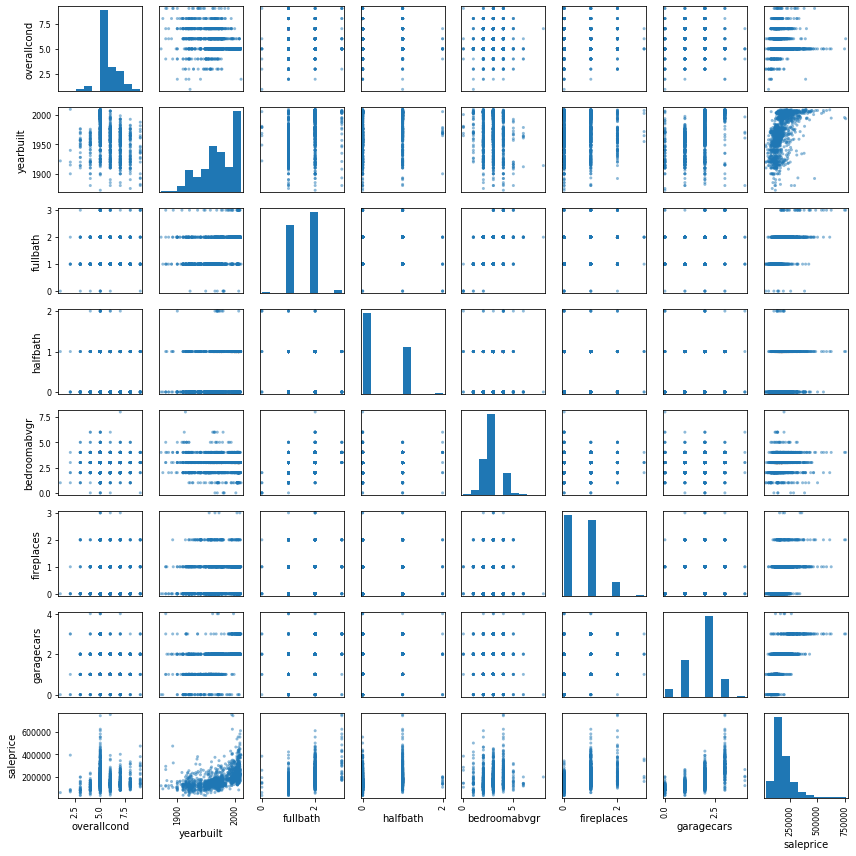

In [9]:
X = housePrices_df

pd.plotting.scatter_matrix(X, figsize=(12, 12))
plt.tight_layout()
plt.show()


** None of these looks linear at all ???? 

### Now, let's build our  model using these features: 
    
overallcond      
yearbuilt        
fullbath         
halfbath        
bedroomabvgr     
fireplaces       
garagecars       

- we build a simple linear regression model and estimate it using OLS

*** from sklearn import linear_model
*** lrm = linear_model.LinearRegression()

- pip install statsmodels if you need it

In [122]:
### neighborhood is categorical so we need to change that
### its a lot of categories so we may not want to use that
#housePrices_df["neighborhood"].value_counts()

In [10]:
# Y is the target variable
Y = housePrices_df['saleprice'].values

# X is the feature set which includes  
X = housePrices_df[['overallcond', 'yearbuilt', 'fullbath', 'halfbath', 'bedroomabvgr','fireplaces','garagecars']]

In [114]:
#### We could use LinearRegression() model from the linear_model module - 
# then we will use the easy way which would be OLS


# We create a LinearRegression model object
# from scikit-learn's linear_model module.

#lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
### LinearRegression()'s fit() method runs the OLS algorithm by default
#lrm.fit(X, Y)

# Inspect the results.
#print('\nCoefficients: \n', lrm.coef_)
#print('\nIntercept: \n', lrm.intercept_)

In [11]:
### Double check that the model is correct
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     314.2
Date:                Wed, 08 Jan 2020   Prob (F-statistic):          2.10e-285
Time:                        19:33:08   Log-Likelihood:                -17871.
No. Observations:                1460   AIC:                         3.576e+04
Df Residuals:                    1452   BIC:                         3.580e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.163e+06    1.2e+05     -9.692      0.000    -1.4e+06   -9.28e+05
overallcond   8931.2203   1277.149      6.993      0.000    6425.967    1.14e+04
yearbuilt      581.8616     60.508      9.616      0.000     463.170     700.554
fullbath      3.514e+04   3178.272     11.056      0.000    2.89e+04    4.14e+04
halfbath       1.17e+04   2848.351      4.106      0.000    6109.119    1.73e+04
bedroomabvgr  1965.0399   1878.323      1.046      0.296   -1719.476    5649.556
fireplaces    3.206e+04   2184.994     14.672      0.000    2.78e+04    3.63e+04
garagecars    3.551e+04   2243.336     15.827      0.000    3.11e+04    3.99e+04
==============================================================================
Omnibus:                      712.576   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7410.220
Skew:                           2.021   Prob(JB):                         0.00
Kurtosis:                      13.270   Cond. No.                     1.80e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Other than "bedroomabvgr" whose pvalue> 0.05 which means that that feature is not significant - all other features are significant in determining sale price.

#### Analysis of the statsmodel function
* NOTE: we added a constant to our existing feature set using this code:X = sm.add_constant(X). This is because statsmodels' fit() function doesn't add a constant by default as opposed to scikit-learn's fit() function.

* when we call the summary() function on the fitted OLS model, it prints out a table statistics.

* in the upper side of the table, we see statistics like R-squared, adjusted R-squared, F-statistic, Log-likelihood, AIC, and BIC. Those are related to the goodness of fit of our model. 

* In the lower part, we see statistics like Durbin-Watson, Jarque-Bera, skewness, and kurtosis. Those statistics are related to whether our model satisfies some assumptions of the linear regression model. 

* For example, skewness is a measure of how asymmetric our data is and kurtosis is a measure of whether our data is heavy or light tailed with respect to a normal distribution. 

* notice that in the middle of the table, estimated values for the coefficients are given, and those are exactly the same as what we got from the scikit-learn.

In [12]:
### We would like to split the data into train and test samples. 
# Use tpc as the y column and split the data with 25% of the data in the test sample.

#split dataset into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


### using stratify=Y is not working here becasue there is not enough llabel in the data?
#This because of the nature of stratification. The stratify parameter set it to split data 
# in a way to allocate test_size amount of data to each class. In this case, 
# you don't have sufficient class labels of one of your classes to keep the data splitting 
# ratio equal to test_size.

### You can either take a random sample (not stratified) or try different test_size values, 
#to be able to have an adequate size that could hold all your various labels.

In [13]:
## Using statsmodels, train the model and print out a summary

### Double check that the model is correct
import statsmodels.api as sm

# We add a constant to the model, the “baseline” of the data in case all of your 
# features values are 0.
X_train = sm.add_constant(X_train)


In [14]:
# Let's train the model!
results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     234.9
Date:                Wed, 08 Jan 2020   Prob (F-statistic):          2.04e-212
Time:                        19:33:46   Log-Likelihood:                -13383.
No. Observations:                1095   AIC:                         2.678e+04
Df Residuals:                    1087   BIC:                         2.682e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -1.19e+06   1.35e+05     -8.831      0.000   -1.45e+06   -9.25e+05
overallcond   7819.8182   1464.301      5.340      0.000    4946.642    1.07e+04
yearbuilt      598.4177     67.743      8.834      0.000     465.497     731.339
fullbath      3.052e+04   3649.876      8.362      0.000    2.34e+04    3.77e+04
halfbath      1.207e+04   3232.246      3.734      0.000    5727.916    1.84e+04
bedroomabvgr  3523.8072   2147.478      1.641      0.101    -689.864    7737.479
fireplaces    3.192e+04   2465.507     12.946      0.000    2.71e+04    3.68e+04
garagecars     3.67e+04   2559.920     14.338      0.000    3.17e+04    4.17e+04
==============================================================================
Omnibus:                      503.310   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4440.393
Skew:                           1.902   Prob(JB):                         0.00
Kurtosis:                      12.102   Cond. No.                     1.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- By Splitting the data, we are getting almost the same results. Therefore does splitting the data even matter? The weather example did not give much better results either when spliting the data.

# Assumptions of linear regression


In [ ]:
 ### 1 - linearity of models in their coefficients

### This is just a random example to show that the model fits in a linear line

df = pd.DataFrame()

# data from 0 to 999
df["X"] = np.arange(0,1000,1)
# we take the square of X
df["X_sq"] = df["X"]**2

# this is our equation: Y = 1 + 2*X + 3*X^2
df["Y"] = 1 + 2*df["X"] + 3*df["X_sq"]

# we fit a linear regression where target is Y
# and features are X and X^2
lrm_example = linear_model.LinearRegression()
lrm_example.fit(df[["X","X_sq"]],df["Y"])

# predictions of the linear regression
predictions = lrm_example.predict(df[["X","X_sq"]])

# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

# we plot the estimated Y and X
# the relationship should be quadratic
plt.scatter(df["X"], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

In [15]:
### 2 - the error term should be zero on average

# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test) ## results is the model

errors = y_test - y_preds # Y is the target variable "charges"

print("Mean of the errors in the house pricing model is: {}".format(np.mean(errors)))

Mean of the errors in the house pricing model is: 1616.102937602084


### What does this error mean?
*** The error is not even close to 0 here? So what does that mean?

This is what we had from the weather model - but that result was close to 0 *** Since, we include the constant term in the model, the average of the model's error is effectively zero. 


### Assumption 3: homoscedasticity


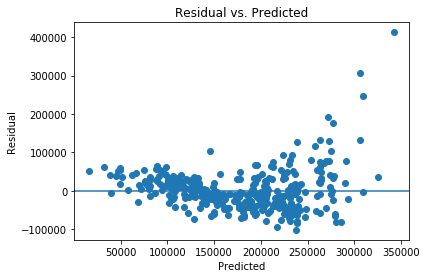

In [16]:
### Assumption 3: homoscedasticity
# - A model is homoscedastic when the error variance shouldn't systematically change 
# across observations. When this assumption is not met, we are dealing with heteroscedasticity.

plt.scatter(y_preds, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [17]:
### Assumption 3: homoscedasticity
# Test for homoscedasticity

#  Bartlett and Levene tests. 
# The null hypothesis for both tests is that the errors are homoscedastic. 

# p-value < 0.05 === > reject null === the errors are NOT homoscedastic
# p-value > 0.05 === > the errors are homoscedastic.


from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(y_preds, errors)
lev_stats = levene(y_preds, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 12.4939 and p value is 0.000408
Levene test statistic value is 40.8605 and p value is 2.92e-10


* The p-values of both tests are lower than 0.05. 
* So, the test results reject the null hypothesis which means our errors are heteroscedastic.


In [ ]:
### Assumption four: low multicollinearity


In [ ]:
### Assumption five: error terms should be uncorrelated with one another
# the error term for one observation shouldn't predict the error term for another. 
# This type of serial correlation may happen if we omit a relevant variable from the model. 
# So, including that variable into the model can solve for this issue.

# To identify whether the error terms are correlated with each other or not, we can graph them

plt.plot(errors)
plt.show()

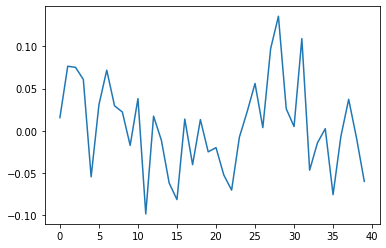

In [18]:
### Assumption 5: Another way to look at correlations between errors is use the autocorrelation function - acf()
# In our case, the order of the errors are the orders of the observations.

from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

* the autocorrelation between the errors of our weather model is indeed very low (ranging between -0.10 and 0.10).

### Again not sure what this means?

In [ ]:
### Assumption six: features shouldn't be correlated with the errors

# the most important assumption: explanatory variables and errors should be independent. 
# If this assumption doesn't hold, then the model's predictions will be unreliable as the 
# estimates of the coefficients would be biased. This assumption is known as the exogeneity.

#### Another important thing to consider is the normality of the error terms. normality of errors is not required to apply OLS to a linear regression model, but in order to measure the statistical significance of our estimated coefficients, error terms must be normally distributed.  There are various ways to check for normality of error terms. 
* An informal way of doing this is by visualizing the errors in a QQ plot or to look at the histogram. 
*** A better way is to use Jarque Bera and normal tests

In [19]:
### null hypothesis is that errors are normally distributed
# p-value < 0.05 === > reject null === the errors are NOT normally distributed
# p-value > 0.05 === > the errors are normally distributed.

from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3011.7471914071443 and p value is 0.0
Normality test statistics is 227.60105256541385 and p value is 3.7762383437787895e-50


pvalue < 0.05 === rejects null and tells us that the errors are not normally distributed

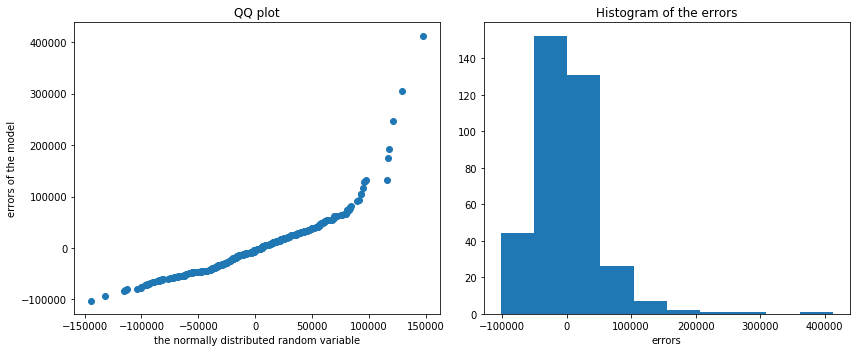

In [20]:
### code to check normality using qq plot or histogram

rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

# Steps to linear regression model
- ### Designing a model: 𝑦=𝛼+𝛽𝑥+𝜃𝑧
- ### Estimating the coefficients: optimization algorithm called Ordinary Least Squares (OLS for short)
- ### Assumptions of linear regression
    * linearity of models in their coefficients
        ###  Don't know how to check this
    * the error term should be zero on average
        ### This assumption is not met
    * homoscedasticity
        ### Assumption is not met
    * low multicollinearity
        ### Don't know how to do this
    * error terms should be uncorrelated with one another and with features
        ### Don't know how to do this
    * normality of the errors
        ### its not normally distributed so assumption not met

- ### Understanding the relationship between features and target